In [4]:
library(data.table)
library(ggplot2)
library(latex2exp)

In [2]:
mypath <- "../../log/server/truncated-random/URV-truncated-random-05/"

In [5]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [6]:
N_AGENTS <- 1134

## 1 news

In [5]:
time <- as.integer(50)

In [6]:
N_AGENTS <- 1134

In [ ]:
N_AGENTS <- 12625

In [ ]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [13]:
list.dirs(mypath)

[1] "2019_17_03_19_47_46" "2019_17_03_19_48_19" "2019_17_03_19_48_53"
   [4] "2019_17_03_19_49_26" "2019_17_03_19_49_59" "2019_17_03_19_50_31"
   [7] "2019_17_03_19_51_02" "2019_17_03_19_51_34" "2019_17_03_19_52_06"
  [10] "2019_17_03_19_52_40" "2019_17_03_19_53_14" "2019_17_03_19_53_47"
  [13] "2019_17_03_19_54_20" "2019_17_03_19_54_54" "2019_17_03_19_55_27"
  [16] "2019_17_03_19_56_00" "2019_17_03_19_56_33" "2019_17_03_19_57_04"
  [19] "2019_17_03_19_57_37" "2019_17_03_19_58_09" "2019_17_03_19_58_42"
  [22] "2019_17_03_19_59_15" "2019_17_03_19_59_48" "2019_17_03_20_00_20"
  [25] "2019_17_03_20_00_52" "2019_17_03_20_01_26" "2019_17_03_20_01_59"
  [28] "2019_17_03_20_02_33" "2019_17_03_20_03_06" "2019_17_03_20_03_40"
  [31] "2019_17_03_20_04_14" "2019_17_03_20_04_47" "2019_17_03_20_05_20"
  [34] "2019_17_03_20_05_55" "2019_17_03_20_06_27" "2019_17_03_20_07_01"
  [37] "2019_17_03_20_07_32" "2019_17_03_20_08_04" "2019_17_03_20_08_37"
  [40] "2019_17_03_20_09_09" "2019_17_03_20_09_43" "2019_17_03_20_10_16"
  [43] "2019_17_03_20_10_49" "2019_17_03_20_11_22" "2019_17_03_20_11_54"
  [46] "2019_17_03_20_12_26" "2019_17_03_20_12_59" "2019_17_03_20_13_32"
  [49] "2019_17_03_20_14_03" "2019_17_03_20_14_35" "2019_17_03_20_15_08"
  [52] "2019_17_03_20_15_42" "2019_17_03_20_16_15" "2019_17_03_20_16_48"
  [55] "2019_17_03_20_17_21" "2019_17_03_20_17_55" "2019_17_03_20_18_28"
  [58] "2019_17_03_20_19_00" "2019_17_03_20_19_32" "2019_17_03_20_20_06"
  [61] "2019_17_03_20_20_38" "2019_17_03_20_21_09" "2019_17_03_20_21_42"
  [64] "2019_17_03_20_22_16" "2019_17_03_20_22_49" "2019_17_03_20_23_22"
  [67] "2019_17_03_20_23_56" "2019_17_03_20_24_29" "2019_17_03_20_25_00"
  [70] "2019_17_03_20_25_32" "2019_17_03_20_26_03" "2019_17_03_20_26_36"
  [73] "2019_17_03_20_27_08" "2019_17_03_20_27_40" "2019_17_03_20_28_14"
  [76] "2019_17_03_20_28_47" "2019_17_03_20_29_20" "2019_17_03_20_29_54"
  [79] "2019_17_03_20_30_26" "2019_17_03_20_30_59" "2019_17_03_20_31_33"
  [82] "2019_17_03_20_32_06" "2019_17_03_20_32_40" "2019_17_03_20_33_14"
  [85] "2019_17_03_20_33_47" "2019_17_03_20_34_20" "2019_17_03_20_34_55"
  [88] "2019_17_03_20_35_29" "2019_17_03_20_36_01" "2019_17_03_20_36_32"
  [91] "2019_17_03_20_37_07" "2019_17_03_20_37_40" "2019_17_03_20_38_14"
  [94] "2019_17_03_20_38_47" "2019_17_03_20_39_22" "2019_17_03_20_39_55"
  [97] "2019_17_03_20_40_28" "2019_17_03_20_40_59" "2019_17_03_20_41_30"
 [100] "2019_17_03_20_42_03" "2019_17_03_20_42_34" "2019_17_03_20_43_07"
 [103] "2019_17_03_20_43_40" "2019_17_03_20_44_15" "2019_17_03_20_44_49"
 [106] "2019_17_03_20_45_21" "2019_17_03_20_45_55" "2019_17_03_20_46_27"
 [109] "2019_17_03_20_46_59" "2019_17_03_20_47_33" "2019_17_03_20_48_06"
 [112] "2019_17_03_20_48_38" "2019_17_03_20_49_10" "2019_17_03_20_49_42"
 [115] "2019_17_03_20_50_15" "2019_17_03_20_50_49" "2019_17_03_20_51_22"
 [118] "2019_17_03_20_51_55" "2019_17_03_20_52_27" "2019_17_03_20_52_59"
 [121] "2019_17_03_20_53_34" "2019_17_03_20_54_06" "2019_17_03_20_54_38"
 [124] "2019_17_03_20_55_07" "2019_17_03_20_55_40" "2019_17_03_20_56_13"
 [127] "2019_17_03_20_56_46" "2019_17_03_20_57_20" "2019_17_03_20_57_54"
 [130] "2019_17_03_20_58_26" "2019_17_03_20_58_58" "2019_17_03_20_59_31"
 [133] "2019_17_03_21_00_03" "2019_17_03_21_00_36" "2019_17_03_21_01_08"
 [136] "2019_17_03_21_01_40" "2019_17_03_21_02_13" "2019_17_03_21_02_46"
 [139] "2019_17_03_21_03_20" "2019_17_03_21_03_53" "2019_17_03_21_04_25"
 [142] "2019_17_03_21_04_58" "2019_17_03_21_05_30" "2019_17_03_21_06_01"
 [145] "2019_17_03_21_06_34" "2019_17_03_21_07_08" "2019_17_03_21_07_41"
 [148] "2019_17_03_21_08_14" "2019_17_03_21_08_48" "2019_17_03_21_09_23"
 [151] "2019_17_03_21_09_57" "2019_17_03_21_10_29" "2019_17_03_21_11_01"
 [154] "2019_17_03_21_11_33" "2019_17_03_21_12_06" "2019_17_03_21_12_39"
 [157] "2019_17_03_21_13_12" "2019_17_03_21_13_45" "2019_17_03_21_14_18"
 [160] "2019_17_03_21_14_51" "2019_17_03_21_15_24" "2019_17_03_21_15_58"
 [163] "2019_17_03_21_16_32" "2019_17_03_21_17_05" "2019_17_0

In [ ]:
thepath = list.dirs(mypath)[1]
thepath

In [ ]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")
memfile = paste(mypath, '/', thepath, '/', 'memoryLog.csv', sep = "")

In [ ]:
DF <- read.csv(file = filename, skip=12)

In [ ]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [ ]:
tempDF

In [ ]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [ ]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [ ]:
DT <- data.table(DF)

In [ ]:
DT1 = DT[, sum(density), by=list(time, state)]

In [ ]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [ ]:
DT1$density <- DT1$density / N_AGENTS

In [ ]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [ ]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 300]
density <- as.numeric(tempDT1[,'density'])

In [ ]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## 2 news

In [2]:
time <- as.integer(50)

In [439]:
N_AGENTS <- 1134

In [ ]:
N_AGENTS <- 12625

In [120]:
mypath <- "../../log/URV-2-news-contact"

In [456]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [457]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [458]:
list.dirs(mypath)

[1] "2019_16_03_15_43_23" "2019_16_03_15_43_35" "2019_16_03_15_43_37"
  [4] "2019_16_03_15_43_42" "2019_16_03_15_43_45" "2019_16_03_15_43_49"
  [7] "2019_16_03_15_43_52" "2019_16_03_15_43_57" "2019_16_03_15_44_00"
 [10] "2019_16_03_15_44_05" "2019_16_03_15_44_08" "2019_16_03_15_44_12"
 [13] "2019_16_03_15_44_15" "2019_16_03_15_44_20" "2019_16_03_15_44_23"
 [16] "2019_16_03_15_44_27" "2019_16_03_15_44_30" "2019_16_03_15_44_34"
 [19] "2019_16_03_15_44_37" "2019_16_03_15_44_42" "2019_16_03_15_44_45"
 [22] "2019_16_03_15_44_49" "2019_16_03_15_44_52" "2019_16_03_15_44_56"
 [25] "2019_16_03_15_45_00" "2019_16_03_15_45_04" "2019_16_03_15_45_07"
 [28] "2019_16_03_15_45_11" "2019_16_03_15_45_15" "2019_16_03_15_45_19"
 [31] "2019_16_03_15_45_23" "2019_16_03_15_45_27" "2019_16_03_15_45_31"
 [34] "2019_16_03_15_45_35" "2019_16_03_15_45_39" "2019_16_03_15_45_42"
 [37] "2019_16_03_15_45_46" "2019_16_03_15_45_50" "2019_16_03_15_45_54"
 [40] "2019_16_03_15_45_58" "2019_16_03_15_46_02" "2019_16_03_15_46_06"
 [43] "2019_16_03_15_46_10" "2019_16_03_15_46_14" "2019_16_03_15_46_19"
 [46] "2019_16_03_15_46_23" "2019_16_03_15_46_27" "2019_16_03_15_46_30"
 [49] "2019_16_03_15_46_34" "2019_16_03_15_46_37" "2019_16_03_15_46_42"
 [52] "2019_16_03_15_46_45" "2019_16_03_15_46_50" "2019_16_03_15_46_53"
 [55] "2019_16_03_15_46_57" "2019_16_03_15_47_01" "2019_16_03_15_47_06"
 [58] "2019_16_03_15_47_09" "2019_16_03_15_47_14" "2019_16_03_15_47_18"
 [61] "2019_16_03_15_47_22" "2019_16_03_15_47_27" "2019_16_03_15_47_31"
 [64] "2019_16_03_15_47_35" "2019_16_03_15_47_40" "2019_16_03_15_47_44"
 [67] "2019_16_03_15_47_48" "2019_16_03_15_47_52" "2019_16_03_15_47_56"
 [70] "2019_16_03_15_48_00" "2019_16_03_15_48_05" "2019_16_03_15_48_08"
 [73] "2019_16_03_15_48_14" "2019_16_03_15_48_17" "2019_16_03_15_48_23"
 [76] "2019_16_03_15_48_25" "2019_16_03_15_48_31" "2019_16_03_15_48_33"
 [79] "2019_16_03_15_48_39" "2019_16_03_15_48_41" "2019_16_03_15_48_47"
 [82] "2019_16_03_15_48_49" "2019_16_03_15_48_56" "2019_16_03_15_48_58"
 [85] "2019_16_03_15_49_04" "2019_16_03_15_49_06" "2019_16_03_15_49_12"
 [88] "2019_16_03_15_49_14" "2019_16_03_15_49_21" "2019_16_03_15_49_22"
 [91] "2019_16_03_15_49_29" "2019_16_03_15_49_31" "2019_16_03_15_49_37"
 [94] "2019_16_03_15_49_39" "2019_16_03_15_49_45" "2019_16_03_15_49_47"
 [97] "2019_16_03_15_49_53" "2019_16_03_15_49_56" "2019_16_03_15_50_02"
[100] "2019_16_03_15_50_04" "2019_16_03_15_50_10" "2019_16_03_15_50_12"
[103] "2019_16_03_15_50_18" "2019_16_03_15_50_20" "2019_16_03_15_50_26"
[106] "2019_16_03_15_50_29" "2019_16_03_15_50_34" "2019_16_03_15_50_37"
[109] "2019_16_03_15_50_42" "2019_16_03_15_50_46" "2019_16_03_15_50_50"
[112] "2019_16_03_15_50_54" "2019_16_03_15_50_58" "2019_16_03_15_51_02"
[115] "2019_16_03_15_51_07" "2019_16_03_15_51_11" "2019_16_03_15_51_16"
[118] "2019_16_03_15_51_20" "2019_16_03_15_51_24" "2019_16_03_15_51_29"
[121] "2019_16_03_15_51_33" "2019_16_03_15_51_37" "2019_16_03_15_51_42"
[124] "2019_16_03_15_51_46" "2019_16_03_15_51_50" "2019_16_03_15_51_54"
[127] "2019_16_03_15_51_59" "2019_16_03_15_52_03" "2019_16_03_15_52_07"
[130] "2019_16_03_15_52_11" "2019_16_03_15_52_15" "2019_16_03_15_52_19"
[133] "2019_16_03_15_52_23" "2019_16_03_15_52_27" "2019_16_03_15_52_31"
[136] "2019_16_03_15_52_35" "2019_16_03_15_52_38" "2019_16_03_15_52_42"
[139] "2019_16_03_15_52_46" "2019_16_03_15_52_50" "2019_16_03_15_52_55"
[142] "2019_16_03_15_52_59" "2019_16_03_15_53_02" "2019_16_03_15_53_07"
[145] "2019_16_03_15_53_10" "2019_16_03_15_53_15" "2019_16_03_15_53_18"
[148] "2019_16_03_15_53_27" "2019_16_03_15_53_30" "2019_16_03_15_53_34"
[151] "2019_16_03_15_53_38" "2019_16_03_15_53_42" "2019_16_03_15_53_46"
[154] "2019_16_03_15_53_50" "2019_16_03_15_53_54" "2019_16_03_15_53_58"
[157] "2019_16_03_15_54_02" "2019_16_03_15_54_06" "2019_16_03_15_54_10"
[160] "2019_16_03_15_54_13" "2019_16_03_15_54_17" "2019_16_03_15_54_21"
[163] "2019_16_03_15_54_25" "2019_16_03_15_54_29" "2019_16_03_15_54_34"
[166] "2019_16_03_15_54_37" "2019_16_03_15

In [459]:
thepath = list.dirs(mypath)[11]

In [460]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")
memfile = paste(mypath, '/', thepath, '/', 'memoryLog.csv', sep = "")

In [461]:
kDF <- read.csv(file = filename, skip=12)
mDF <- read.csv(file = memfile, skip=12)

In [ ]:
tempkDF <- kDF[kDF$state =='i',]
tempkDF <- tempkDF[tempkDF$time == 1,]

tempmDF <- mDF[mDF$spreadstate =='i',]
tempmDF <- tempmDF[tempmDF$time == 1,]

In [ ]:
tempkDF
tempmDF

kcore1 <- as.integer(tempkDF[1,'k.core'])
kcore2 <- as.integer(tempkDF[2,'k.core'])

agent1 <- as.integer(tempkDF[1,'agent'])
agent2 <- as.integer(tempkDF[2,'agent'])
news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

agent1
news1
kcore1

agent2
news2
kcore2

In [ ]:
tempkDF
tempmDF

kcore1 <- as.integer(tempkDF[1,'k.core'])
kcore2 <- as.integer(tempkDF[2,'k.core'])
if (kcore1 == kcore2){
    agent1 <- as.integer(tempkDF[1,'agent'])
    agent2 <- as.integer(tempkDF[2,'agent'])
} else {
    kcore1 <- min(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))
    kcore2 <- max(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))

    agent1 <- as.integer(tempkDF[tempkDF$k.core == kcore1,]['agent'])
    agent2 <- as.integer(tempkDF[tempkDF$k.core == kcore2,]['agent'])
}

news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

agent1
news1
kcore1

agent2
news2
kcore2

In [ ]:
mDF$'density' <- 1
mDF$'k.core.tuple' <- paste(toString(kcore1), toString(kcore2), sep=",")

In [ ]:
mDT <- data.table(mDF)

In [ ]:
mDT1 = mDT[, sum(density), by=list(time, spreadstate, news0)]

In [ ]:
names(mDT1)[names(mDT1)=="V1"] <- "density"

In [ ]:
mDT1$density <- mDT1$density / N_AGENTS

In [ ]:
mDT1[mDT1$time == 50,]

In [ ]:
#mDT1 <- mDT1[mDT1$news0!=0,]

In [ ]:
mDT1$k.core.init <- 0
mDT1$agent.init <- 0

mDT1[mDT1$news0==news1,]$k.core.init <- kcore1
mDT1[mDT1$news0==news2,]$k.core.init <- kcore2

mDT1[mDT1$news0==news1,]$agent.init <- agent1
mDT1[mDT1$news0==news2,]$agent.init <- agent2

In [ ]:
mDT1[mDT1$time == 50]

In [ ]:
tempmDT1 <- mDT1[mDT1$spreadstate == 'r']
tempmDT1 <- tempmDT1[tempmDT1$time == 50]
density1 <- as.numeric(tempmDT1[tempmDT1$news0 == news1,][,'density'])
density2 <- as.numeric(tempmDT1[tempmDT1$news0 == news2,][,'density'])
density1
density2

In [ ]:
tempmDT1

In [ ]:
mDT1$spreadstate[mDT1$news0 == 0] <- 'r'
mDT1 = mDT1[mDT1$spreadstate == 'r']

mDT1[,spreadstate:=NULL]

## All datasets 2 news

In [121]:
emptytable <- data.table()
lista = list.dirs(mypath)

for (i in lista){
    kcore1 <- 0
    kcore2 <- 0
    agent1 <- 0
    agent2 <- 0
    news1  <- 0
    news2  <- 0
    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    memfile = paste(mypath, '/', i , '/', 'memoryLog.csv', sep = "")
    #print(filename)
    
    kDF <- read.csv(file = filename, skip=12)
    mDF <- read.csv(file = memfile, skip=12)
    
    tempkDF <- kDF[kDF$state =='i',]
    tempkDF <- tempkDF[tempkDF$time == 1,]

    tempmDF <- mDF[mDF$spreadstate =='i',]
    tempmDF <- tempmDF[tempmDF$time == 1,]
    
    kcore1 <- as.integer(tempkDF[1,'k.core'])
    kcore2 <- as.integer(tempkDF[2,'k.core'])
    
    print(i)
    
    if (kcore1 == kcore2){
        agent1 <- as.integer(tempkDF[1,'agent'])
        agent2 <- as.integer(tempkDF[2,'agent'])
    } else {
        kcore1 <- min(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))
        kcore2 <- max(as.integer(tempkDF[1,'k.core']),as.integer(tempkDF[2,'k.core']))

        agent1 <- as.integer(tempkDF[tempkDF$k.core == kcore1,]['agent'])
        agent2 <- as.integer(tempkDF[tempkDF$k.core == kcore2,]['agent'])
    }

    news1 <- tempmDF[tempmDF$agent == agent1,][,'news0']
    news2 <- tempmDF[tempmDF$agent == agent2,][,'news0']

    mDF$'density' <- 1

    mDT <- data.table(mDF)
    mDT1 = mDT[, sum(density), by=list(time, spreadstate, news0)]
    names(mDT1)[names(mDT1)=="V1"] <- "density"
    mDT1$density <- mDT1$density / N_AGENTS

    mDT1$k.core.init <- 0
    mDT1$agent.init <- 0

    mDT1[mDT1$news0==news1,]$k.core.init <- kcore1
    mDT1[mDT1$news0==news2,]$k.core.init <- kcore2

    mDT1[mDT1$news0==news1,]$agent.init <- agent1
    mDT1[mDT1$news0==news2,]$agent.init <- agent2

    mDT1$spreadstate[mDT1$news0 == 0] <- 'r'
    mDT1 = mDT1[mDT1$spreadstate != 'i']
    mDT1[,spreadstate:=NULL]

    mDT1 <- rbindlist(list(mDT1, list(1, news1, 0., kcore1, agent1)))
    mDT1 <- rbindlist(list(mDT1, list(1, news2, 0., kcore2, agent2)))

    mDT1$news0[mDT1$news0 %in% "0"] <- "news 0"
    mDT1$news0[mDT1$news0 %in% news1] <- "news 1"
    mDT1$news0[mDT1$news0 %in% news2] <- "news 2"
    
    mDT1$k.core.init[mDT1$k.core.init %in% 0] <- -1
    mDT1$agent.init[mDT1$agent.init %in% 0] <- -1
    
    mDT1$'file' <- i
    mDT1$'sym' <- paste(toString(kcore1), toString(kcore2), sep="-")
    #print(mDT1)
    emptytable <- rbind(emptytable, mDT1)
}

[1] "2019_16_03_15_43_23"
[1] "2019_16_03_15_43_35"
[1] "2019_16_03_15_43_37"
[1] "2019_16_03_15_43_42"
[1] "2019_16_03_15_43_45"
[1] "2019_16_03_15_43_49"
[1] "2019_16_03_15_43_52"
[1] "2019_16_03_15_43_57"
[1] "2019_16_03_15_44_00"
[1] "2019_16_03_15_44_05"
[1] "2019_16_03_15_44_08"
[1] "2019_16_03_15_44_12"
[1] "2019_16_03_15_44_15"
[1] "2019_16_03_15_44_20"
[1] "2019_16_03_15_44_23"
[1] "2019_16_03_15_44_27"
[1] "2019_16_03_15_44_30"
[1] "2019_16_03_15_44_34"
[1] "2019_16_03_15_44_37"
[1] "2019_16_03_15_44_42"
[1] "2019_16_03_15_44_45"
[1] "2019_16_03_15_44_49"
[1] "2019_16_03_15_44_52"
[1] "2019_16_03_15_44_56"
[1] "2019_16_03_15_45_00"
[1] "2019_16_03_15_45_04"
[1] "2019_16_03_15_45_07"
[1] "2019_16_03_15_45_11"
[1] "2019_16_03_15_45_15"
[1] "2019_16_03_15_45_19"
[1] "2019_16_03_15_45_23"
[1] "2019_16_03_15_45_27"
[1] "2019_16_03_15_45_31"
[1] "2019_16_03_15_45_35"
[1] "2019_16_03_15_45_39"
[1] "2019_16_03_15_45_42"
[1] "2019_16_03_15_45_46"
[1] "2019_16_03_15_45_50"
[1] "2019_16

In [122]:
rawtable <- emptytable
rawtable <- rawtable[with(rawtable, order(time, file, news0)), ]

In [123]:
save(rawtable,file=paste(mypath, "/", "rawtable.Rda", sep=""))

In [124]:
rawtable <- rawtable[rawtable$time < 15]

#rawtable

In [125]:
toplot <- rawtable[, mean(density), by=list(time, news0, k.core.init, sym)][,c('time', 'news0', 'k.core.init', 'sym')]
#toplot
toplot$mean <- rawtable[, mean(density), by=list(time, news0, k.core.init, sym)][,'V1']
toplot$std  <- rawtable[,   sd(density), by=list(time, news0, k.core.init, sym)][,'V1']
#toplot <- toplot[with(toplot, order(k.core.init, news0, time)), ]

#toplot

In [126]:
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

Logistic Sigmoid

$f(x,y,dy;x_0,\mu,\sigma,A,m) = m + A \frac{1}{\sigma + e^{\mu x}}$

$\text{Logistic}(x,y,dy;x_0,\mu,K) = \frac{K}{1 + e^{-\mu (x - x_0)}}$

In [127]:
expo <- function(x, a) { 1 - exp(-a*x) }

In [128]:
sigmoid <- function(x, par) { par[3]/(1  + exp(-par[2]*(x - par[1]))) }

In [129]:
sigmoid1 <- function(x, par) { 1 - par[3]/(1  + exp(-par[2]*(x - par[1]))) }

In [130]:
logistic_std = function(x,y,w, x0,mu,scale){
    f = function(p){
        d = p[3]/(1 + exp(-p[2]*(x-p[1])))
        sum((d-y)^2/((w+0.00001)^2))
    }
    optim(
        par=c(x0,mu,scale),
        fn=f,
        lower=c(0,0,0),
        method="L-BFGS-B"
    )
}

In [131]:
logistic1_std = function(x,y,w, x0,mu,scale){
    f = function(p){
        d = 1 - p[3]/(1 + exp(-p[2]*(x-p[1])))
        sum((d-y)^2/((w+0.00001)^2))
    }
    optim(
        par=c(x0,mu,scale),
        fn=f,
        lower=c(0,0,0),
        method="L-BFGS-B"
    )
}

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 2
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.69721018257 0.03539971705 245.68587 < 2.22e-16
m 0.60959043382 0.00949121260  64.22682 1.6155e-15
k 0.42327644068 0.00268725511 157.51256 < 2.22e-16

Residual standard error: 0.00258440597 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.59518641e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.25431756581  0.05968356334 171.81142 < 2.22e-16
m  0.65316983219  0.01600263419  40.81639 2.3193e-13
k  0.19158783735  0.00249096382  76.91314 2.2333e-16

Residual standard error: 0.00153629321 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 6.87496979e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 9.99167002315 0.04059

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 3
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 9.04887743851 0.03002972057 301.33072 < 2.22e-16
m 0.59769378710 0.00742248646  80.52474 < 2.22e-16
k 0.43024492084 0.00237807665 180.92138 < 2.22e-16

Residual standard error: 0.00201870547 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.01549251e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.31657588527  0.04596742268 224.43233 < 2.22e-16
m  0.65303971039  0.01220406019  53.51004 1.1962e-14
k  0.15670010645  0.00157952634  99.20702 < 2.22e-16

Residual standard error: 0.000949278593 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.05260193e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.52603846059  0.

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

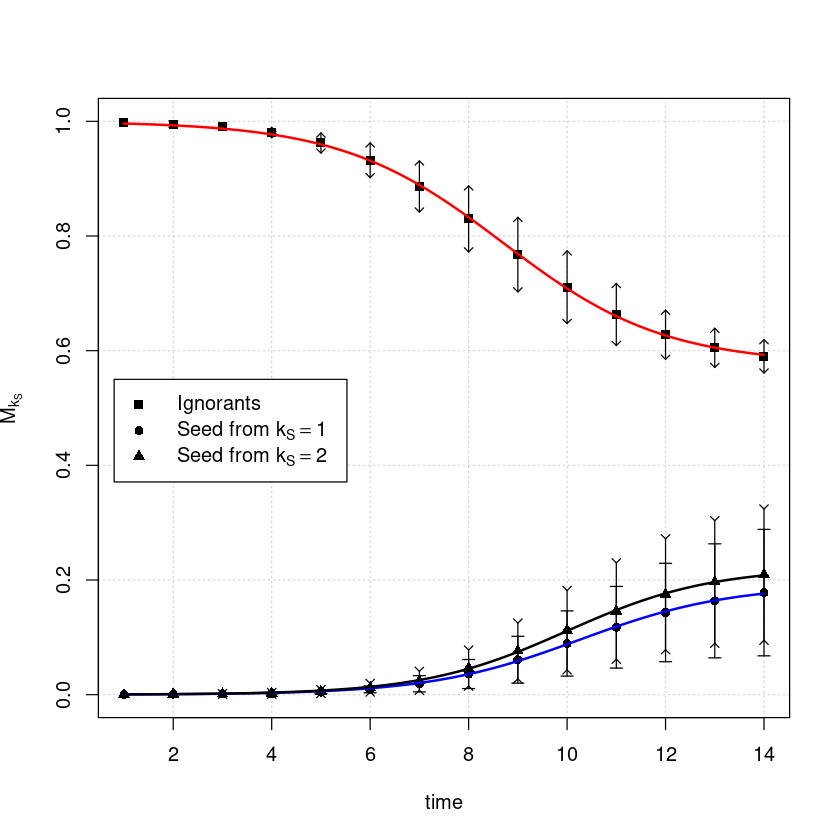

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 4
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.80208918416 0.02831747105 310.83599 < 2.22e-16
m 0.61879109243 0.00780752314  79.25575 < 2.22e-16
k 0.42737211674 0.00220712648 193.63282 < 2.22e-16

Residual standard error: 0.00209599127 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.23247832e-07

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.12378557843  0.03331524795 303.87844 < 2.22e-16
m  0.71403005431  0.01145932717  62.30995 2.2526e-15
k  0.16870575010  0.00126337278 133.53600 < 2.22e-16

Residual standard error: 0.000913213706 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.63908274e-07

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.26373131132  0.

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

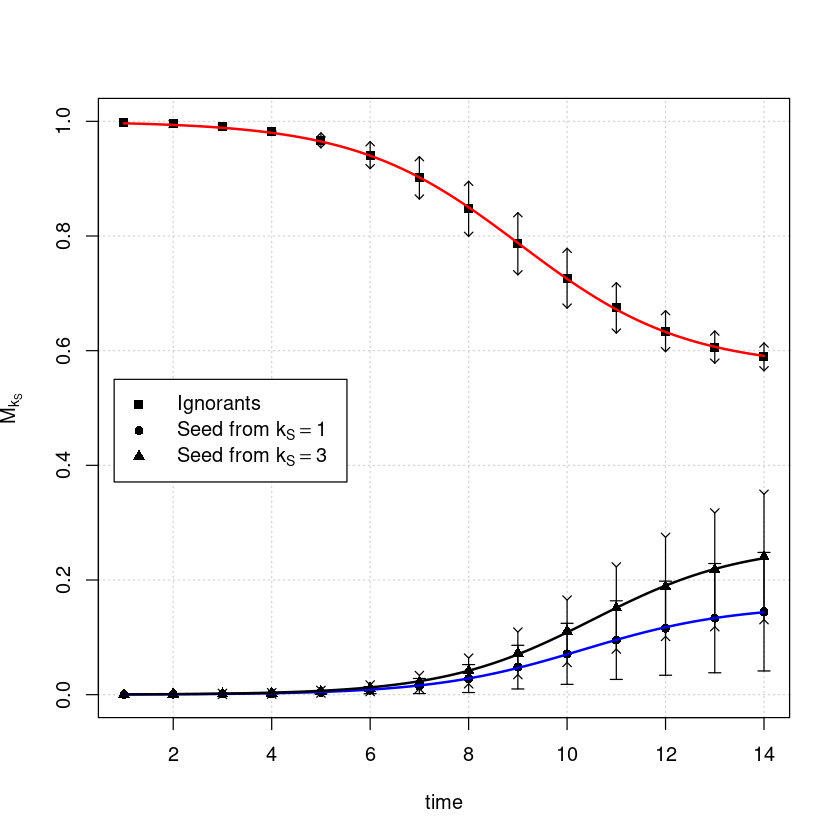

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 5
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 9.08400504210 0.02768879688 328.07511 < 2.22e-16
m 0.60022504733 0.00689279194  87.08011 < 2.22e-16
k 0.42270856184 0.00216595524 195.16034 < 2.22e-16

Residual standard error: 0.00182797767 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.54432144e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.39873188031  0.04902611852 212.10596 < 2.22e-16
m  0.66893006324  0.01369065860  48.86033 3.2388e-14
k  0.17809056675  0.00195760377  90.97376 < 2.22e-16

Residual standard error: 0.00117028525 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.91135945e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.51339454417  0.0

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

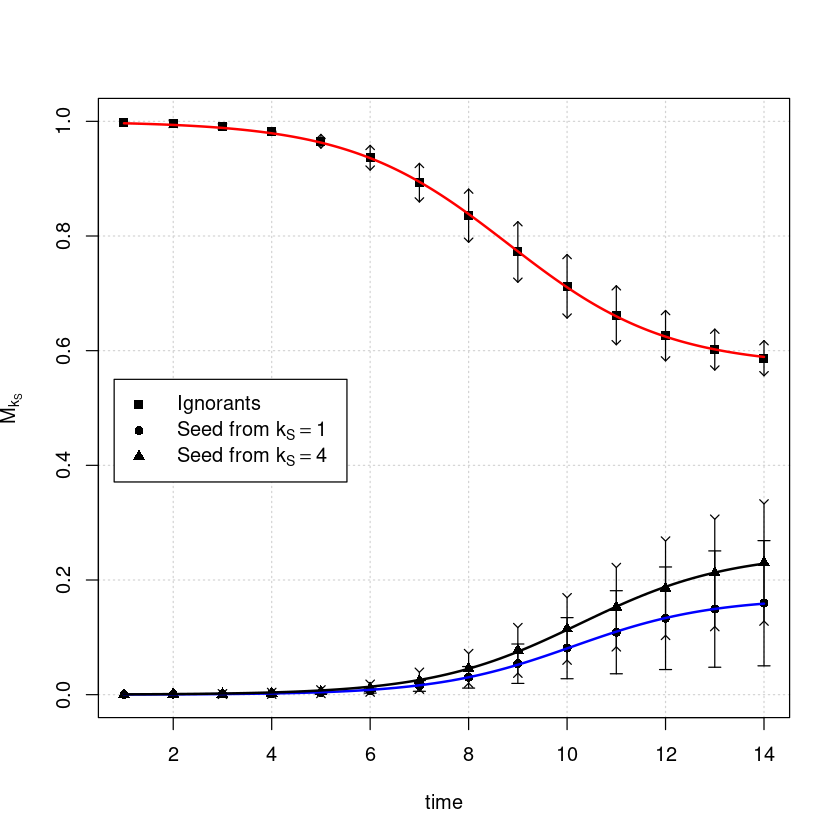

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 6
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.85348801897 0.03792302163 233.45946 < 2.22e-16
m 0.59568382698 0.00947140068  62.89290 2.0338e-15
k 0.42003824283 0.00287217466 146.24398 < 2.22e-16

Residual standard error: 0.00257405002 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 7.97837999e-07

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.11587650258  0.04135735100 244.59682 < 2.22e-16
m  0.64777792939  0.01107056620  58.51353 4.4891e-15
k  0.14925810580  0.00131900465 113.15965 < 2.22e-16

Residual standard error: 0.00085135549 on 11 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 7.45085469e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.29848038119  0.0

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

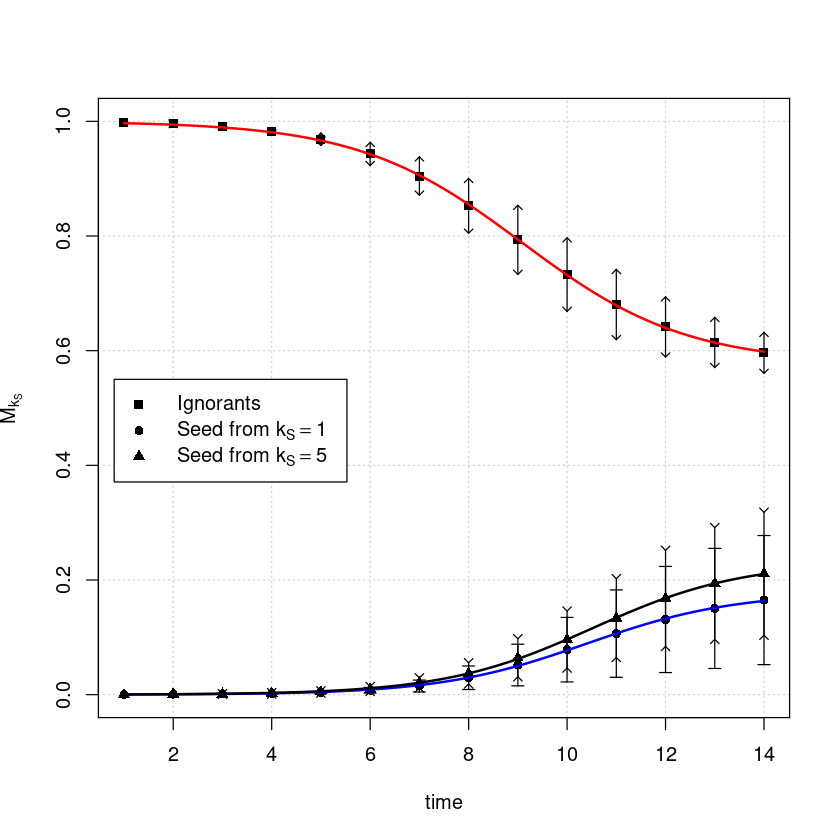

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 7
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.99798898460 0.02773739424 324.39922 < 2.22e-16
m 0.59043852144 0.00668212134  88.36094 < 2.22e-16
k 0.44154669918 0.00223048530 197.95992 < 2.22e-16

Residual standard error: 0.00189566131 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.2458361e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.31066656507  0.04630744580 222.65678 < 2.22e-16
m  0.65178589928  0.01224343368  53.23555 1.2656e-14
k  0.20007106061  0.00202817401  98.64591 < 2.22e-16

Residual standard error: 0.0012190568 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.4137298e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.54957287930  0.0391

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

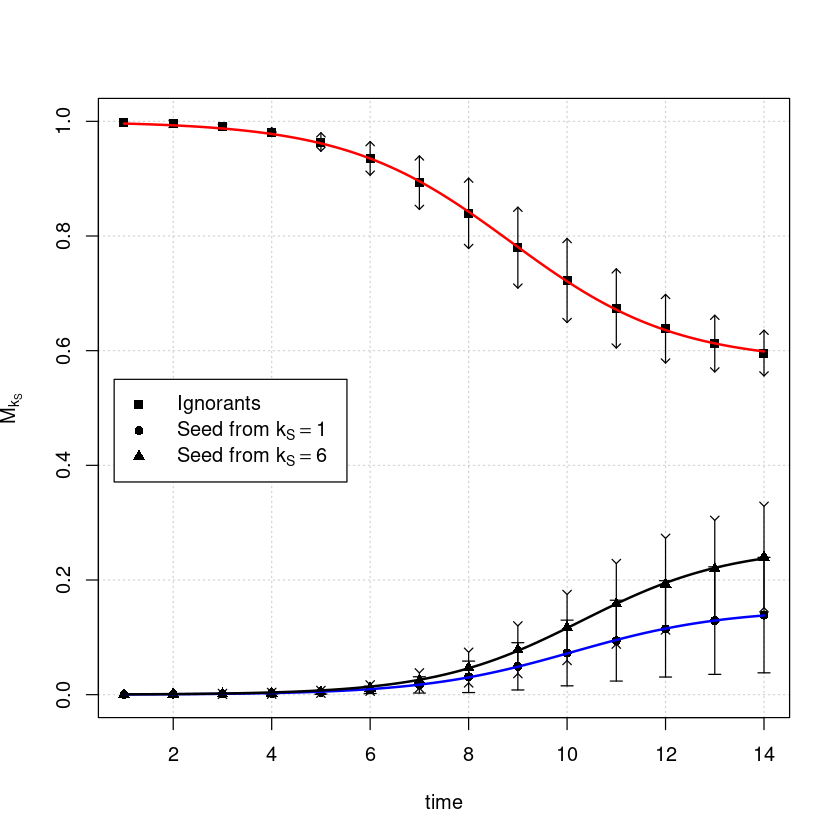

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 8
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
      Estimate   Std. Error   t value   Pr(>|t|)
a 9.0382145010 0.0352993429 256.04484 < 2.22e-16
m 0.5869973345 0.0083455363  70.33668 5.9587e-16
k 0.4090181055 0.0026324779 155.37380 < 2.22e-16

Residual standard error: 0.00219506947 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.10636453e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.55942125655  0.05895865885 179.09874 < 2.22e-16
m  0.61698154639  0.01295438349  47.62724 4.2852e-14
k  0.15838413325  0.00203256768  77.92318 < 2.22e-16

Residual standard error: 0.00102724876 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 5.49983085e-06

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.35399763357  0.040922365

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

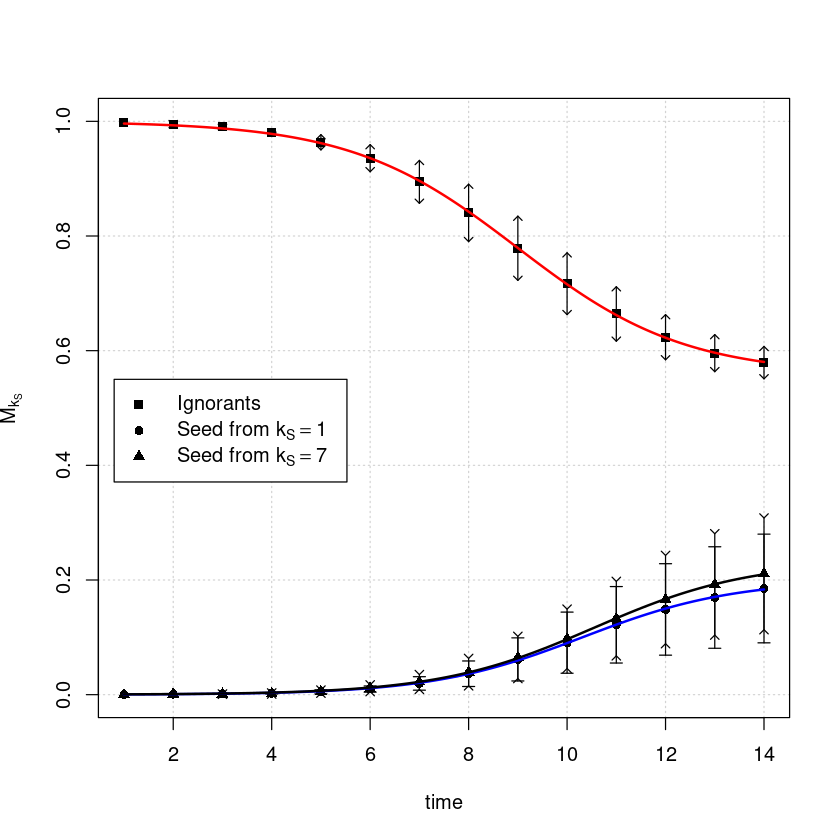

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 9
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.58995723029 0.03886409806 221.02551 < 2.22e-16
m 0.62048996019 0.01097604198  56.53130 6.5508e-15
k 0.41816131551 0.00290462345 143.96404 < 2.22e-16

Residual standard error: 0.0029332792 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 4.86091341e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 9.98374401672 0.04620394893 216.07989 < 2.22e-16
m 0.65704399738 0.01306633202  50.28527 2.3639e-14
k 0.15091157305 0.00147984783 101.97776 < 2.22e-16

Residual standard error: 0.00102254499 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 4.34242842e-07

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 9.98572615398 0.06154079355 16

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

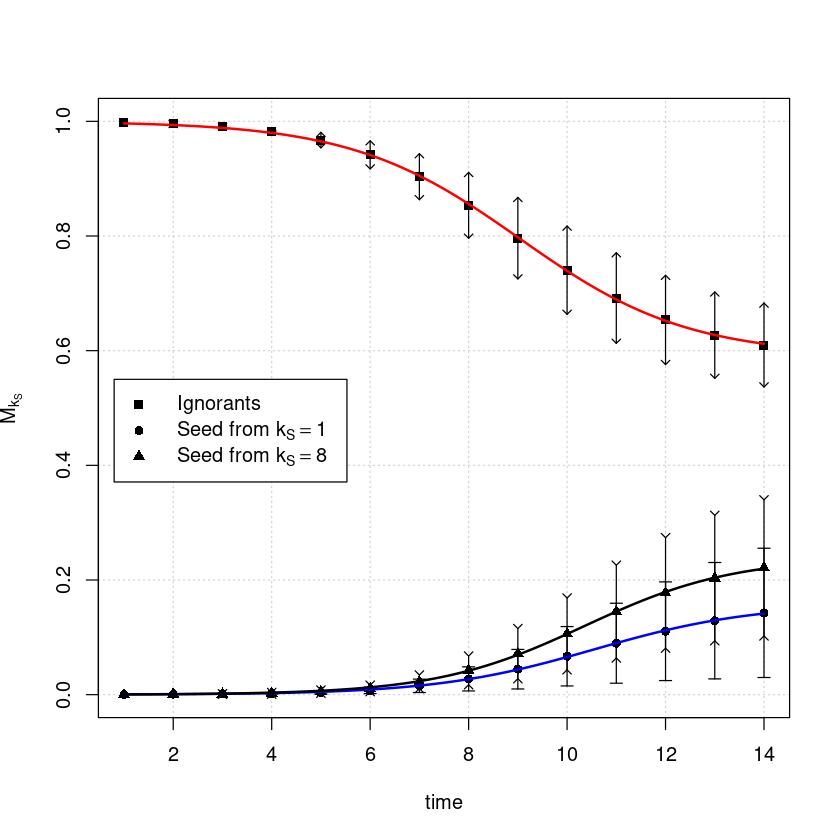

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

[1] 10
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.75126238171 0.04220114704 207.37025 < 2.22e-16
m 0.60246192433 0.01094061995  55.06653 8.7357e-15
k 0.42178089607 0.00319332213 132.08216 < 2.22e-16

Residual standard error: 0.00298521969 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.2136852e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.35911192236  0.04416981560 234.52921 < 2.22e-16
m  0.60687064713  0.00960073048  63.21088 1.9243e-15
k  0.11753641512  0.00109658048 107.18449 < 2.22e-16

Residual standard error: 0.000592171969 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 4.67413038e-07

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.06011407563  0.

Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in replayPlot(obj):
“zero-length arrow is of indeterminate angle and so skipped”

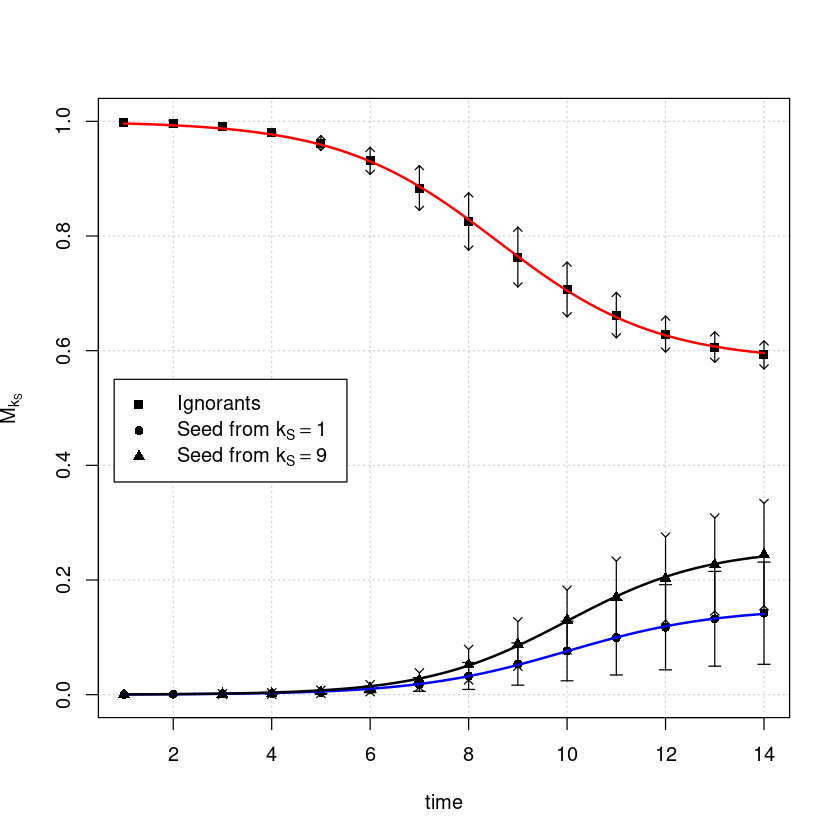

Warning message in arrows(n0$time, n0$mean - n0$std, n0$time, n0$mean + n0$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n1$time, n1$mean - n1$std, n1$time, n1$mean + n1$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(n2$time, n2$mean - n2$std, n2$time, n2$mean + n2$std, :
“zero-length arrow is of indeterminate angle and so skipped”

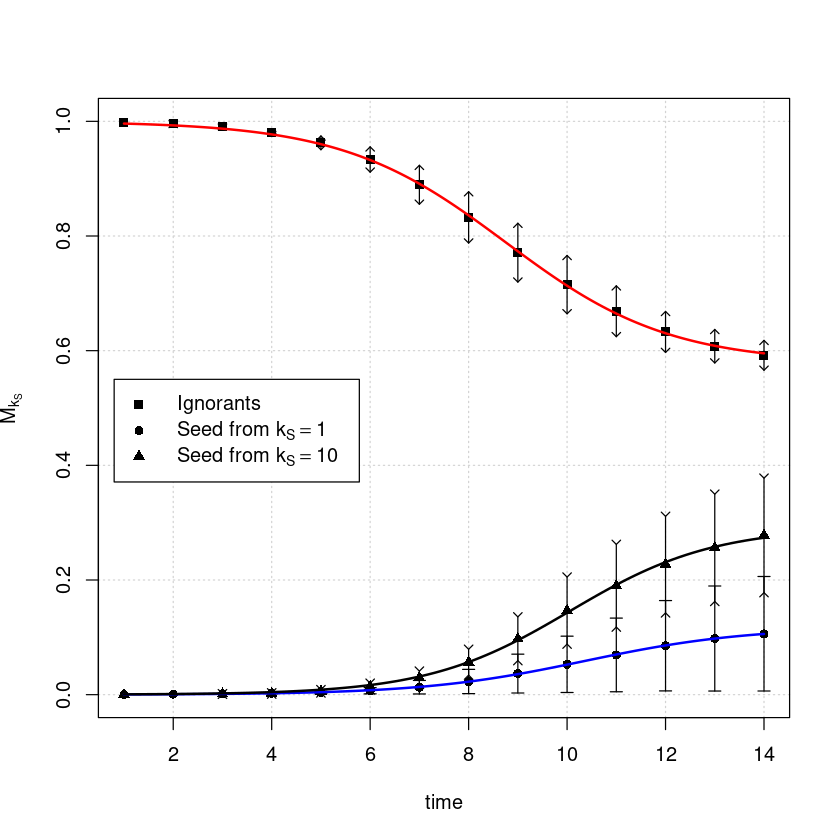

[1] 11
[1] "par0"

Formula: y ~ 1 - k/(1 + exp(-m * (x - a)))

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 8.88190479241 0.02983522972 297.69856 < 2.22e-16
m 0.59914598912 0.00753992053  79.46317 < 2.22e-16
k 0.43170252313 0.00233483163 184.89664 < 2.22e-16

Residual standard error: 0.00208909391 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.36331905e-06

[1] "par1"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.06352711300  0.03868674724 260.12854 < 2.22e-16
m  0.67893012838  0.01178218180  57.62346 5.3108e-15
k  0.15659944170  0.00131896396 118.72913 < 2.22e-16

Residual standard error: 0.000919270471 on 11 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 6.36058418e-07

[1] "par2"

Formula: y ~ k/(1 + exp(-m * (x - a)))

Parameters:
        Estimate     Std. Error   t value   Pr(>|t|)
a 10.44209593697  0

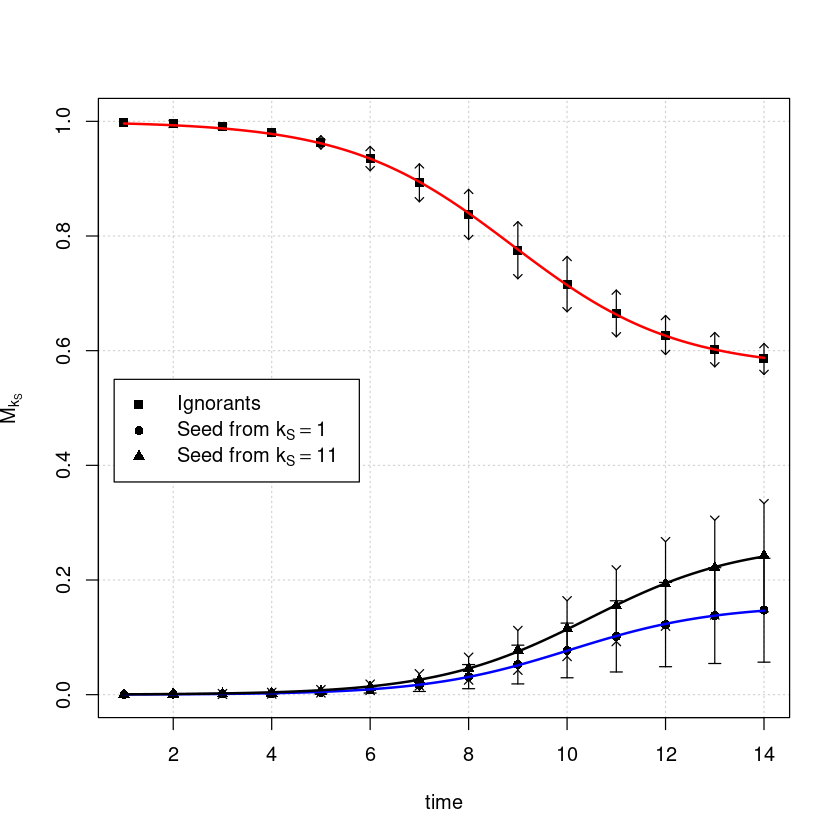

In [132]:
for (index in 2:11) {
ks <- index
oktoplot <- toplot[toplot$sym == paste('1-',toString(ks), sep="")]
n0 <-  oktoplot[oktoplot$news0 == "news 0"]
n1 <-  oktoplot[oktoplot$news0 == "news 1"]
n2 <-  oktoplot[oktoplot$news0 == "news 2"]
xmin <- min(n0$time)
xmax <- max(n0$time)


y <- n0$mean
x <- n0$time
par0 <- nls(y~1-k/(1  + exp(-m*(x - a))),start=list(a=10,m=2,k=10))
#logistic_std_p  =  logistic1_std(n0$time, n0$mean, n0$std,
#                                 coef(summary(par0))["a","Estimate"],
#                                 coef(summary(par0))["m","Estimate"],
#                                 coef(summary(par0))["k","Estimate"])
#pstd0  = logistic_std_p$par
#pstd0

y <- n1$mean
x <- n1$time
par1 <- nls(y~k/(1  + exp(-m*(x - a))),start=list(a=10,m=2,k=10))
expar1 <- nls(y~1-exp(-(a+1)*x), start=list(a=1))
#logistic_std_p  =  logistic_std(n1$time, n1$mean, n1$std,
#                                 coef(summary(par1))["a","Estimate"],
#                                 coef(summary(par1))["m","Estimate"],
#                                 coef(summary(par1))["k","Estimate"])
#pstd1  = logistic_std_p$par
#pstd1


y <- n2$mean
x <- n2$time
par2 <- nls(y~k/(1  + exp(-m*(x - a))),start=list(a=10,m=2,k=10))

#logistic_std_p  =  logistic_std(n2$time, n2$mean, n2$std,
#                                 coef(summary(par2))["a","Estimate"],
#                                 coef(summary(par2))["m","Estimate"],
#                                 coef(summary(par2))["k","Estimate"])
#pstd2  = logistic_std_p$par
#pstd2

#for (index in 1:100){
#    logistic_std_p  =  logistic1_std(n0$time, n0$mean, n0$std, pstd0[1], pstd0[2], pstd0[3])
#    pstd0  = logistic_std_p$par
#
#    logistic_std_p  =  logistic_std(n1$time, n1$mean, n1$std, pstd1[1], pstd1[2], pstd1[3])
#    pstd1  = logistic_std_p$par
#
#    logistic_std_p  =  logistic_std(n2$time, n2$mean, n2$std, pstd2[1], pstd2[2], pstd2[3])
#    pstd2  = logistic_std_p$par
#}

#pdf(paste("./URV-2-news-contact-k",toString(ks),".pdf",sep=""))

plot(n0$time, n0$mean, 
     pch=15,
     xlab="time",
     ylab=TeX("$M_{k_S}$"),
     xlim=range(xmin, xmax),
     ylim=range(c(0,1)), 
     panel.first=grid())
points(n1$time, n1$mean, pch=16) 
points(n2$time, n2$mean, pch=17)

arrows(n0$time, n0$mean-n0$std, n0$time,n0$mean +n0$std, length=0.05, angle=45, code=3)
arrows(n1$time, n1$mean-n1$std, n1$time,n1$mean +n1$std, length=0.05, angle=90, code=3)
arrows(n2$time, n2$mean-n2$std, n2$time,n2$mean +n2$std, length=0.05, angle=135, code=3)

#data.frame(unclass(summary(par0)), check.names = FALSE, stringsAsFactors = FALSE)
print(ks)
print("par0")
print(summary(par0))
print("par1")
print(summary(par1))
print("par2")
print(summary(par2))
    
par0 <- c(coef(summary(par0))["a","Estimate"],
          coef(summary(par0))["m","Estimate"],
          coef(summary(par0))["k","Estimate"])
par1 <- c(coef(summary(par1))["a","Estimate"],
          coef(summary(par1))["m","Estimate"],
          coef(summary(par1))["k","Estimate"])
par2 <- c(coef(summary(par2))["a","Estimate"],
          coef(summary(par2))["m","Estimate"],
          coef(summary(par2))["k","Estimate"])

curve(sigmoid1(x, par0), xmin, xmax, n=300, add=TRUE, lty=1, lwd=2, col="red")
curve(sigmoid(x, par1), xmin, xmax, n=100, add=TRUE, lty=1, lwd=2, col="blue")
curve(sigmoid(x, par2), xmin, xmax, n=100, add=TRUE, lty=1, lwd=2, col="black")

#abline(v=par0[1], col="red", lty=2, lwd=0.5, alpha=0.2)
#abline(v=par1[1], col="blue", lty=2, lwd=0.5, alpha=0.2)
#abline(v=par2[1], col="black", lty=2, lwd=0.5, alpha=0.2)

#abline(h=1-par0[3], col="red", lty=2, lwd=0.5, alpha=0.2)
#abline(h=par1[3], col="blue", lty=2, lwd=0.5, alpha=0.2)
#abline(h=par2[3], col="black", lty=2, lwd=0.5, alpha=0.2)
#abline(h=par1[3]+par2[3], col="green")

print("sum")
print(par1[3] + par2[3])

    
#curve(sigmoid1(x, pstd0), xmin, xmax, n=300, add=TRUE, lty=3, lwd=2, col="red")
#curve(sigmoid(x, pstd1), xmin, xmax, n=100, add=TRUE, lty=3, lwd=2, col="blue")
#curve(sigmoid(x, pstd2), xmin, xmax, n=100, add=TRUE, lty=3, lwd=2, col="black")

#data.frame(
#    pstd = c("x0", "mu", "A"),
#    news0=c(pstd0),
#    news1=c(pstd1),
#    news2=c(pstd2)
#)

data.frame(
    par = c("x0", "mu", "A"),
    news0=c(par0),
    news1=c(par1),
    news2=c(par2)
)

legend(20,1, pch = c(NA,NA,NA), 
       lty=c(1, 1, 1), 
       lwd=c(2, 2, 2),
       col = c("red", "blue", "black"),
       legend = c("NLS ignorants",
                  TeX("NLS Fit $k_S = 1$"),
                  TeX(paste("NLS Fit $k_S = ", toString(ks),"$", sep=""))
                  ))

legend(0.8,0.55, pch = c(15,16,17), lty=c(NA,NA,NA), lwd=c(NA,NA,NA),
        col = c("black", "black", "black"),
        legend = c(
            "Ignorants",
            TeX("Seed from $k_S = 1$"),
            TeX(paste("Seed from $k_S = ", toString(ks),"$", sep=""))
))

   #dev.off()
}

Saving 6.67 x 6.67 in image


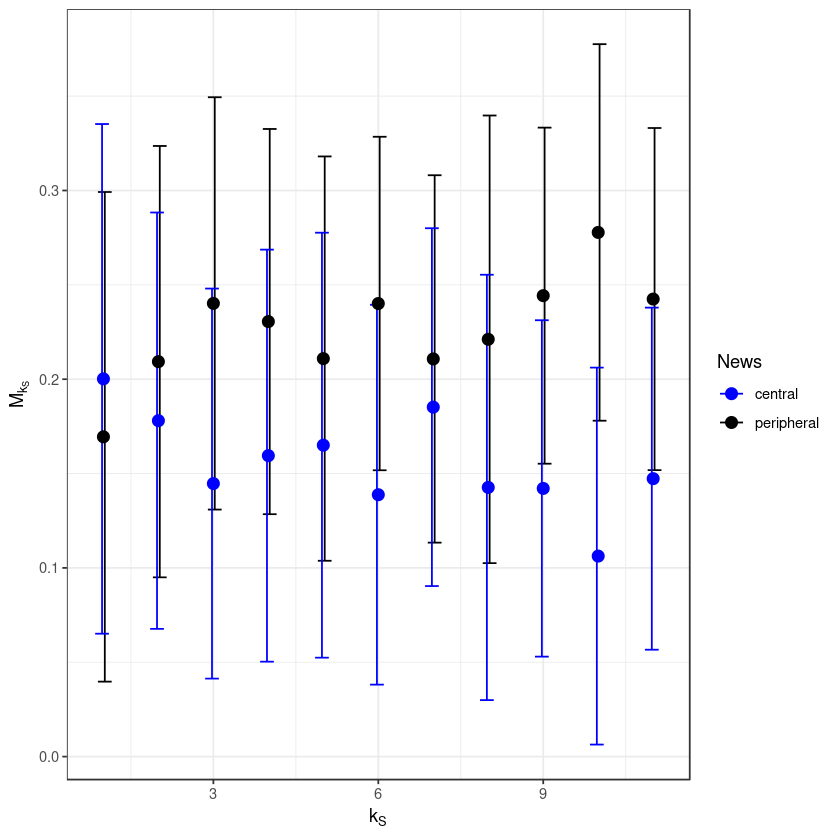

In [133]:
kcoreplot <- toplot[toplot$k.core.init >= 1]
kcoreplot <- kcoreplot[kcoreplot$time == 14]
kcoreplot <- kcoreplot[order(kcoreplot$sym)]
#kcoreplot <- kcoreplot[order(kcoreplot$k.core.init)]
kcoreplot$k.core.sym <- c(1,1,10,10,11,11,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9)
#kcoreplot <- kcoreplot[kcoreplot$sym != '1-1']
#kcoreplot
ggplot(kcoreplot, aes(k.core.sym, mean, col=news0)) +
    geom_errorbar(aes(ymin=mean-std, ymax=mean+std), width=.5,
                 position=position_dodge(0.1)) +
    geom_point(size=3) +
    #coord_trans(y="log10") +
    scale_color_manual(values=c("blue", "black"), 
                       name="News",
                       labels=c("central", "peripheral") ) +
    theme_bw()+
    labs(x=TeX("$k_S$"), y=TeX("M_{k_S}"))

ggsave("URV-2-news-contact-mks.pdf")

In [18]:
data.frame(unclass(summary(par0)), check.names = FALSE, stringsAsFactors = FALSE)


,unclass(summary(par0))
Min.,0.436642054358
1st Qu.,0.511713218676
Median,0.586784382993
Mean,3.320260249099
3rd Qu.,4.762069346469
Max.,8.937354309944


In [23]:
summary(par0)

       Min.     1st Qu.      Median        Mean     3rd Qu.        Max. 
0.436642054 0.511713219 0.586784383 3.320260249 4.762069346 8.937354310 

In [146]:
n1$time
n1$time[4:length(n1$time)]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14

[1]  4  5  6  7  8  9 10 11 12 13 14

Nonlinear regression model
  model: y ~ 1 - exp(-(a + 1) * x)
   data: parent.frame()
           a 
-0.993966589 
 residual sum-of-squares: 0.00215034399

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.69962262e-06

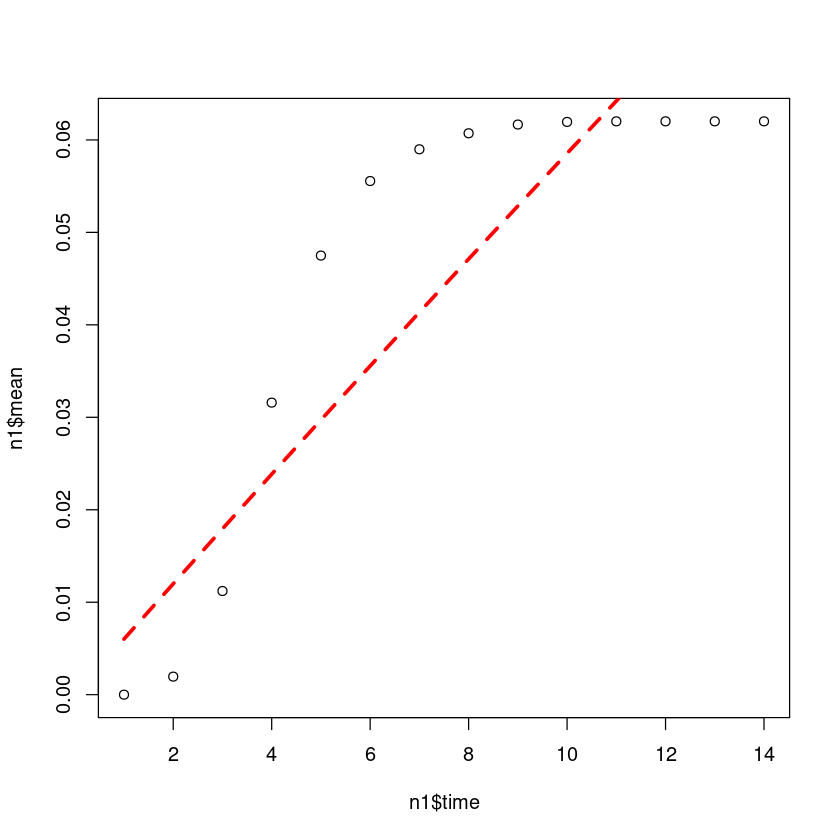

In [135]:
plot(n1$time, n1$mean)
expar1
lines(n1$time,predict(expar1),lty=2,col="red",lwd=3)

ERROR: Error in getInitial.default(func, data, mCall = as.list(match.call(func, : no 'getInitial' method found for "function" objects


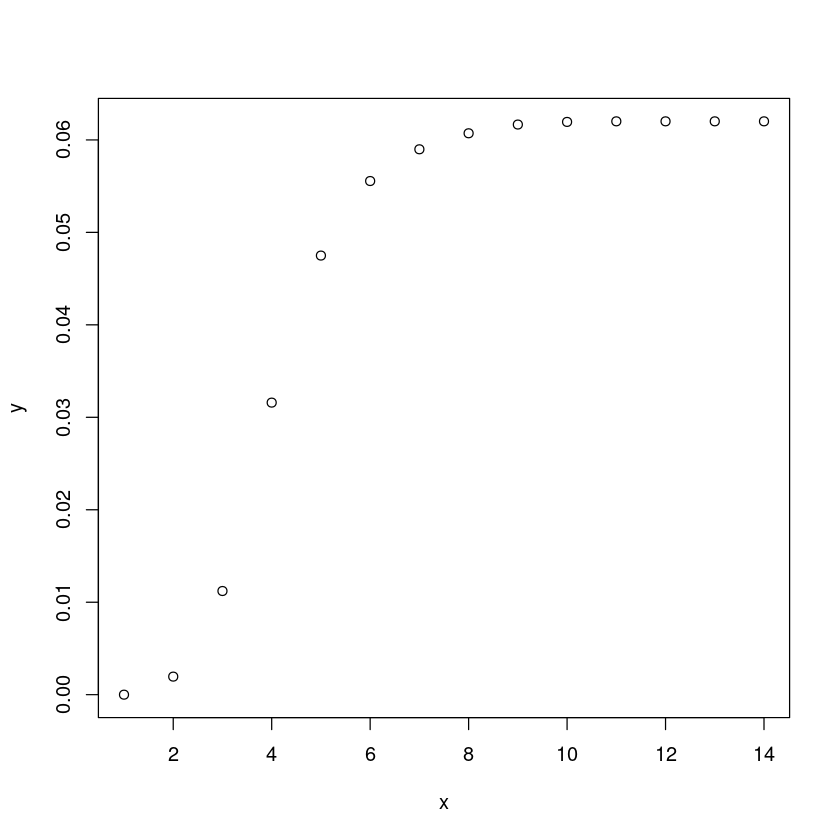

In [87]:
y <- n1$mean
x <- n1$time

plot(x,y)
nls(1-y ~ exp(- x))
#nls(y ~ - exp( - a/b*x  ), start=list(a=1,b=0.1), trace=TRUE )
#curve(expo(x, c(13,1)))

[1] 1.08193483999


Waiting for profiling to be done...


            2.5%         97.5%
b1 1.13770756702 1.25313455728
b2 1.49736352251 2.49648380268


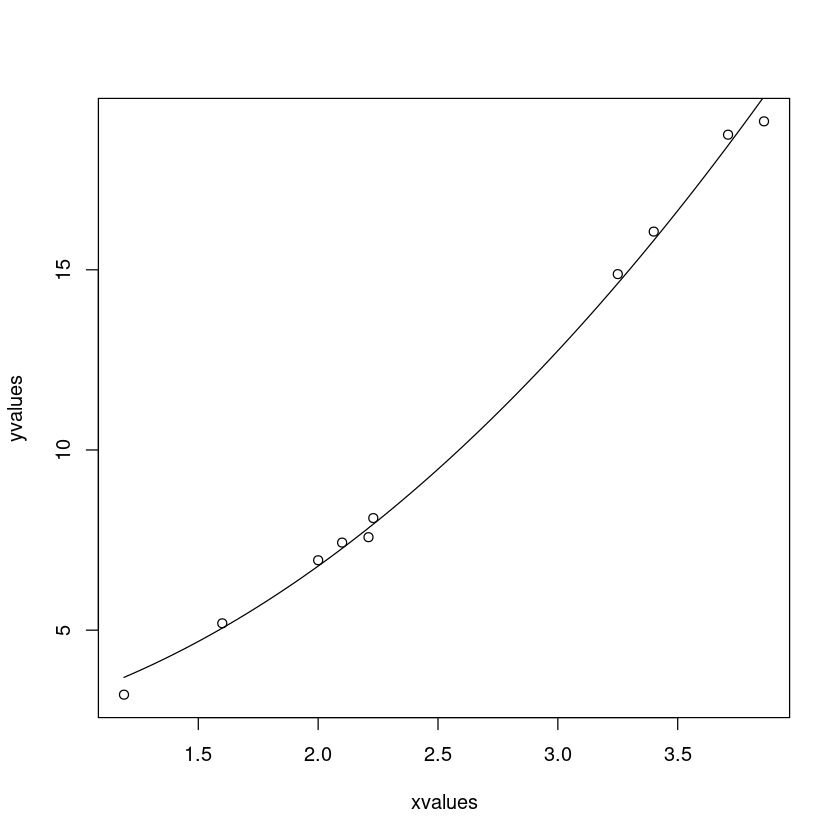

In [59]:
xvalues <- c(1.6,2.1,2,2.23,3.71,3.25,3.4,3.86,1.19,2.21)
yvalues <- c(5.19,7.43,6.94,8.11,18.75,14.88,16.06,19.12,3.21,7.58)

# Plot these values.
plot(xvalues,yvalues)


# Take the assumed values and fit into the model.
model <- nls(yvalues ~ b1*xvalues^2+b2,start = list(b1 = 1,b2 = 3))

# Plot the chart with new data by fitting it to a prediction from 100 data points.
new.data <- data.frame(xvalues = seq(min(xvalues),max(xvalues),len = 100))
lines(new.data$xvalues,predict(model,newdata = new.data))

# Get the sum of the squared residuals.
print(sum(resid(model)^2))

# Get the confidence intervals on the chosen values of the coefficients.
print(confint(model))

In [ ]:
tt <- toplot[toplot$time == 14]
tt <- tt[tt$news0 != "news 0"]
tt <- tt[tt$k.core.init > 1]
tt

ggplot(tt, aes(k.core.init, mean)) + 
    geom_errorbar(aes(ymin = mean - std, ymax = mean + std)) + 
    geom_line() + 
    labs(x=TeX("$k_S$"), y=TeX("M_{k_S}"))+
    theme_bw()+
    theme(legend.justification = "top",) +
    theme(legend.position = c(0.5, 0.8),legend.background = element_rect(fill="#ffffff00", size=2, linetype="solid")) +
    #scale_y_log10() +
    coord_trans(y="log10") 
    #scale_color_manual(values = c("red", "blue", "black"), name = expression(alpha),label=c("1","0.5","0.1")) 

In [ ]:
y <- n1$mean
x <- n1$time
par <- nls(y~k/(1  + exp(-m*(x - a))),start=list(a=10,m=2,k=10))

In [ ]:
summary(par)

In [ ]:
coef(summary(par))["a","Estimate"]

In [ ]:
pstd2
plot(sigmoid(1:10, pstd2), xlim=c(0,30),ylim=c(-10,10), lty=3, lwd=2, col="red")


In [ ]:
library(gridExtra)

p <- list()

for (i in 2:11){
    oktoplot <- toplot[toplot$sym == paste('1-',toString(i), sep="")]
    p[[i-1]] <-ggplot(oktoplot, aes(time, mean, col=news0 )) + 
    geom_line() +
    geom_errorbar(aes(ymin = mean - std, ymax = mean + std))+
    xlab("time") + ylab("MkS") + theme_bw() +
    #theme(legend.position = c(0.8, 0.8),legend.background = element_rect(fill="#ffffff00", size=0.5, linetype="solid"))+
    scale_color_manual(values = c("red","blue", "black")) + 
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
         ) +
    theme(axis.title.y=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks.y=element_blank()
         ) +
    annotate("text", x = 19, y=0.9, label = paste("Competition between\n k-core 1 and ", toString(i),sep=""))

    #                   label=c(
    #                       "Ignorant density",
    #                       TeX("Density of nodes w. seed from $k_S = 1$"),
    #                       "c"),name = "Legend")
}

w <- ggplot() + theme_bw()+
  theme(#axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    #panel.border = element_blank(),
    panel.background = element_blank()) 

g<-grid.arrange(grobs=p[-6],
            layout_matrix = matrix(c(1,2,3,
                                     4,5,6,
                                     7,8,9  
                                    ), ncol=3, byrow=TRUE))
g
ggsave("URV-2-news-contact.pdf",g)

In [ ]:
diffrawtable <- rawtable[, diff(density), by=list(time, file)]
sumrawtable <- rawtable[, sum(density), by=list(time, file)]
merge(x = rawtable, y = diffrawtable, by = c("time","file"), all.x = TRUE)

In [ ]:
emptytable <- rawtable

In [ ]:
emptytabletime <- emptytable[emptytable$time == 50]

#emptytabletime <- emptytabletime[emptytabletime$k.core.init > 1]

toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
#toplot
toplot$mean <- emptytabletime[emptytabletime$time == 50][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 50][, sd(density), by=list(time, k.core.init)][,'V1']
#toplot

In [ ]:
toplot = toplot[order(toplot$k.core.init),]

In [ ]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [ ]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)


## All datasets,  single news

Assemble everything and do the loops

In [424]:
mypath <- "../../log/URV-test-powerlaw"

In [425]:
length(list.dirs(mypath))

[1] 537

In [426]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    #print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore

    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

In [427]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [428]:
emptytable <- rawtable

In [429]:
emptytabletime <- emptytable[emptytable$time == 50]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.02]
emptytabletime <- emptytabletime[emptytabletime$density > 0.5]
#emptytabletime <- emptytabletime[emptytabletime$k.core.init > 1]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 50][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 50][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [430]:
toplot[is.na(toplot)] <- 1e-4

In [431]:
toplot = toplot[order(toplot$k.core.init),]

In [432]:
typeof(toplot)

[1] "list"

In [433]:
save(emptytabletime,file=paste(mypath, "/", "eptytabletime.Rda", sep=""))
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [434]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [435]:
toplot

k.core.init,mean,std
1,0.608358067708,0.0188145019400
2,0.613646384480,0.0221791348196
3,0.612208904726,0.0188459018562
4,0.614296512256,0.0228709617987
5,0.616612989801,0.0220346315012
6,0.615376309254,0.0224155849325
7,0.614491475603,0.0189720488011
8,0.614296512256,0.0222672716531
9,0.613450671274,0.0178199537091
10,0.610877155095,0.0149779650802


Plot

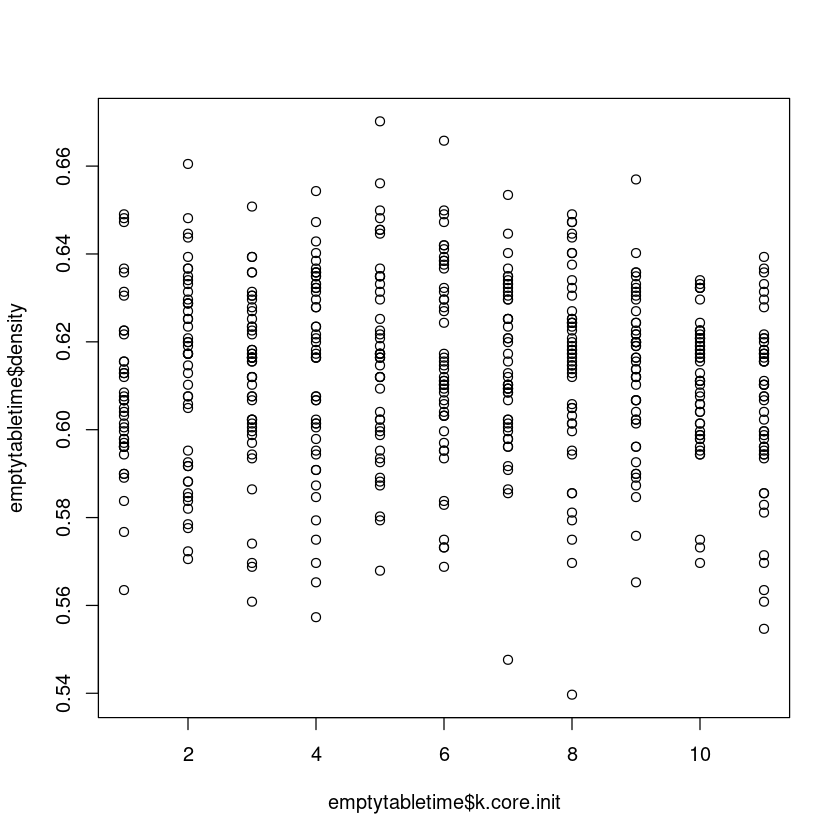

In [436]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [437]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
            Min              1Q          Median              3Q             Max 
-0.006136504109 -0.000984130021  0.001217632567  0.002087521901  0.003754798016 

Coefficients:
                   Estimate      Std. Error   t value Pr(>|t|)
(Intercept)  0.613961631301  0.002183216862 281.21880  < 2e-16
x           -0.000220687903  0.000321897765  -0.68558  0.51025

Residual standard error: 0.00337609224 on 9 degrees of freedom
Multiple R-squared:  0.0496329398,	Adjusted R-squared:  -0.0559634002 
F-statistic: 0.47002519 on 1 and 9 DF,  p-value: 0.510247413


[1] 0.222784514347


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
            Min              1Q          Median              3Q             Max 
-0.001414025742 -0.000779075472 -0.000494823385  0.000953556107  0.002066306239 

Coefficients:
                   Estimate      Std. Error    t value   Pr(>|t|)
(Intercept)  0.612637503883  0.000382373924 1602.19478 < 2.22e-16
poly(x, 2)1 -0.002314594254  0.001268190836   -1.82512    0.10542
poly(x, 2)2 -0.009471827983  0.001268190836   -7.46877  7.136e-05

Residual standard error: 0.00126819084 on 8 degrees of freedom
Multiple R-squared:  0.880799119,	Adjusted R-squared:  0.850998898 
F-statistic: 29.5567989 on 2 and 8 DF,  p-value: 0.000201891421


[1] 0.938508986992

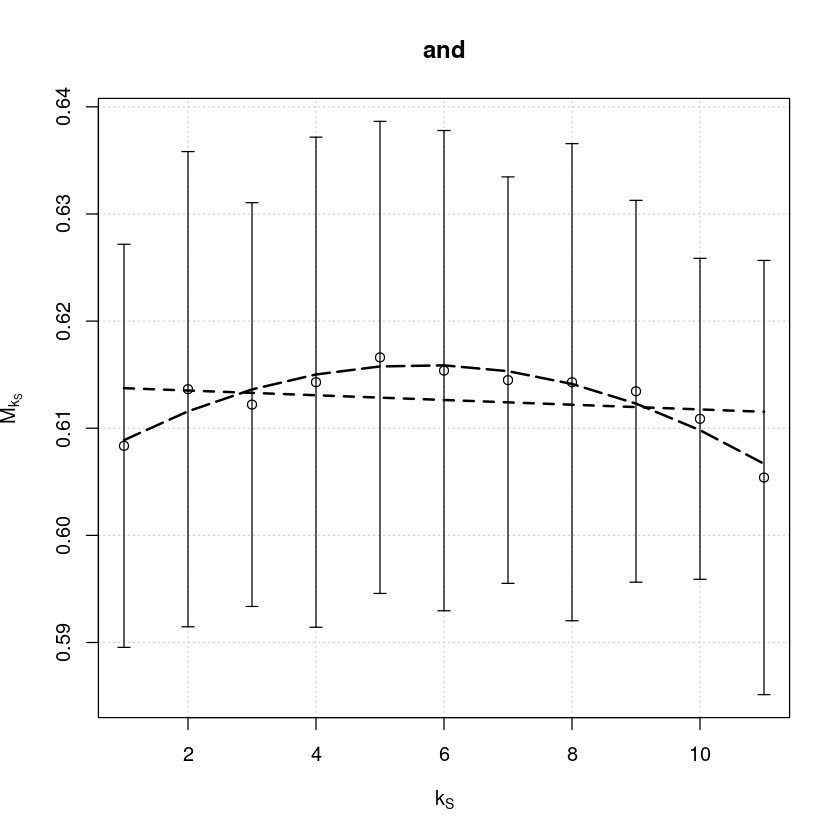

In [438]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y, main="and",
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
a 0.61457891388 0.00485912675 126.47929 6.1333e-16
b 0.01589085160 0.02142913213   0.74155    0.47726

Residual standard error: 0.0109232528 on 9 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 8.31029645e-06


[1] 0.243171005964


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
       Estimate    Std. Error   t value   Pr(>|t|)
b -0.8316152646  0.0365196922 -22.77169 6.0134e-10

Residual standard error: 0.227787047 on 10 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 8.61173161e-06


[1] 0.136255885779

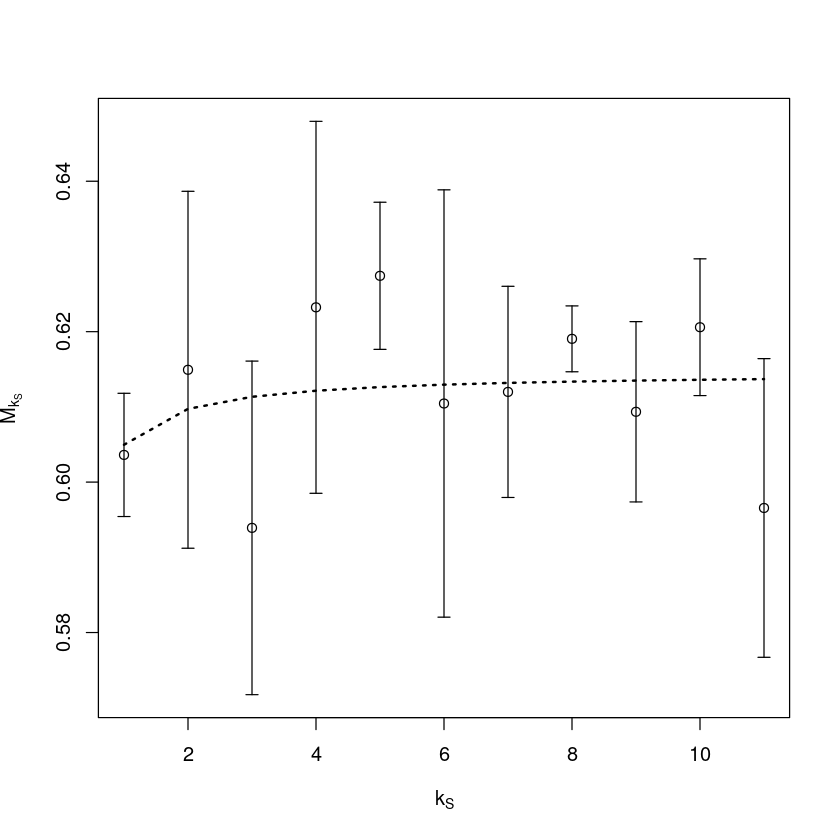

In [343]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
#lines(x,predict(m),lty=4,col="black",lwd=2)

In [344]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

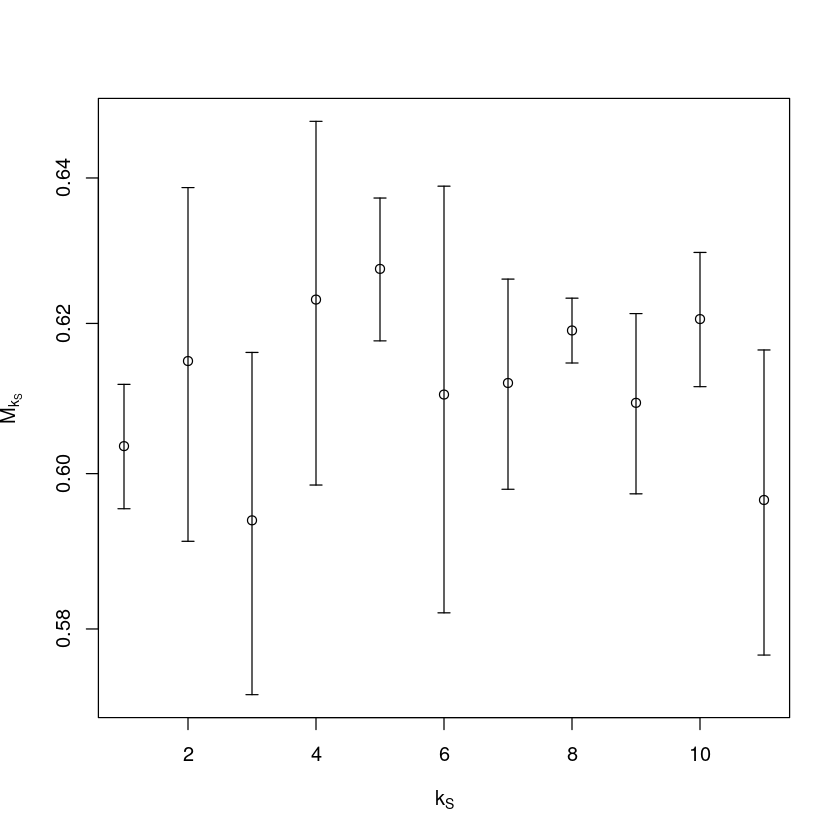

In [345]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [346]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2